In [1]:
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization, add
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import keras
from NpyDataGenerator import NpyDataGenerator
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import os

/home/shohei/.conda/envs/tensorenv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.visible_device_list="0"
sess = tf.Session(config=config)
K.set_session(sess)

In [3]:
model_name = "CNN"
num_classes = 13
classes = ['0gaikan', '1genkan', '2ima', '3kittin', '4huro', '5toire', '6senmen', '7syuno', '8beranda', '9entoransu', '10tyusyajo', '11setubi', '12sonota']
work_dir = '/home/shohei/shohei/housing-classifier'
input_shape=(224, 224, 3)

In [4]:
def CNN():
    model = Sequential()
    model.add(Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5)))

    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

In [5]:
%pylab inline --no-import-all
def plot_history(history, save_name):
    # print(history.history.keys())

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.savefig(save_name + "/loss.png")
    plt.show()
    
    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.savefig(save_name + "/acc.png")
    plt.show()
    
    # CSV出力
    df = pd.DataFrame({
        'loss' : history.history['loss'],
        'val_loss' : history.history['val_loss'],
        'acc' : history.history['acc'],
        'val_acc' : history.history['val_acc']
    })
    df.to_csv(save_name + '/history.csv')

Populating the interactive namespace from numpy and matplotlib


In [6]:
train_datagen = NpyDataGenerator()
test_datagen = NpyDataGenerator()
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

Epoch 1/300
10/10 [==============================] - 2s - loss: 2.4852 - acc: 0.1300 - val_loss: 2.3555 - val_acc: 0.3500
Epoch 2/300
10/10 [==============================] - 1s - loss: 2.5945 - acc: 0.2500 - val_loss: 2.4592 - val_acc: 0.2500
Epoch 3/300
10/10 [==============================] - 1s - loss: 2.5318 - acc: 0.1700 - val_loss: 2.3571 - val_acc: 0.1500
Epoch 4/300
10/10 [==============================] - 1s - loss: 2.3824 - acc: 0.1800 - val_loss: 2.0244 - val_acc: 0.3000
Epoch 5/300
10/10 [==============================] - 1s - loss: 2.2769 - acc: 0.2100 - val_loss: 2.5958 - val_acc: 0.1000
Epoch 6/300
10/10 [==============================] - 1s - loss: 2.3551 - acc: 0.2100 - val_loss: 2.0968 - val_acc: 0.2500
Epoch 7/300
10/10 [==============================] - 1s - loss: 2.3459 - acc: 0.1600 - val_loss: 2.3088 - val_acc: 0.3000
Epoch 8/300
10/10 [==============================] - 1s - loss: 2.2414 - acc: 0.2600 - val_loss: 2.2730 - val_acc: 0.1000
Epoch 9/300
10/10 [=====

10/10 [==============================] - 1s - loss: 0.3215 - acc: 0.9400 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 68/300
10/10 [==============================] - 1s - loss: 1.6060 - acc: 0.6400 - val_loss: 1.0584 - val_acc: 0.6500
Epoch 69/300
10/10 [==============================] - 1s - loss: 1.0780 - acc: 0.7600 - val_loss: 0.0206 - val_acc: 1.0000
Epoch 70/300
10/10 [==============================] - 1s - loss: 1.2237 - acc: 0.8700 - val_loss: 1.5994 - val_acc: 0.9000
Epoch 71/300
10/10 [==============================] - 1s - loss: 1.6262 - acc: 0.8200 - val_loss: 1.2511 - val_acc: 0.7500
Epoch 72/300
10/10 [==============================] - 1s - loss: 1.5978 - acc: 0.5500 - val_loss: 1.5289 - val_acc: 0.5500
Epoch 73/300
10/10 [==============================] - 1s - loss: 1.7042 - acc: 0.5300 - val_loss: 0.9159 - val_acc: 0.8000
Epoch 74/300
10/10 [==============================] - 1s - loss: 1.2706 - acc: 0.5900 - val_loss: 0.8824 - val_acc: 0.7000
Epoch 75/300
10/10 [=========

10/10 [==============================] - 1s - loss: 0.4319 - acc: 0.9300 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 134/300
10/10 [==============================] - 1s - loss: 0.8252 - acc: 0.9300 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 135/300
10/10 [==============================] - 1s - loss: 0.1741 - acc: 0.9800 - val_loss: 6.4377e-06 - val_acc: 1.0000
Epoch 136/300
10/10 [==============================] - 1s - loss: 0.4571 - acc: 0.9700 - val_loss: 0.8059 - val_acc: 0.9500
Epoch 137/300
10/10 [==============================] - 1s - loss: 0.7545 - acc: 0.9100 - val_loss: 4.2584e-04 - val_acc: 1.0000
Epoch 138/300
10/10 [==============================] - 1s - loss: 0.4465 - acc: 0.9400 - val_loss: 0.0748 - val_acc: 1.0000
Epoch 139/300
10/10 [==============================] - 1s - loss: 0.0735 - acc: 0.9700 - val_loss: 1.0106e-04 - val_acc: 1.0000
Epoch 140/300
10/10 [==============================] - 1s - loss: 0.5032 - acc: 0.9600 - val_loss: 0.1058 - val_acc: 0.9500
Ep

10/10 [==============================] - 1s - loss: 0.2977 - acc: 0.9500 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 199/300
10/10 [==============================] - 1s - loss: 0.3404 - acc: 0.9800 - val_loss: 0.0925 - val_acc: 0.9500
Epoch 200/300
10/10 [==============================] - 1s - loss: 0.2318 - acc: 0.9700 - val_loss: 3.3618e-06 - val_acc: 1.0000
Epoch 201/300
10/10 [==============================] - 1s - loss: 0.1506 - acc: 0.9800 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 202/300
10/10 [==============================] - 1s - loss: 0.0338 - acc: 0.9800 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 203/300
10/10 [==============================] - 1s - loss: 0.1698 - acc: 0.9800 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 204/300
10/10 [==============================] - 1s - loss: 2.2025e-06 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 205/300
10/10 [==============================] - 1s - loss: 0.1620 - acc: 0.9800 - val_loss: 1.1921e-07 - val_acc: 1

10/10 [==============================] - 1s - loss: 10.6379 - acc: 0.3400 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 264/300
10/10 [==============================] - 1s - loss: 12.7333 - acc: 0.2100 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 265/300
10/10 [==============================] - 1s - loss: 12.4109 - acc: 0.2300 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 266/300
10/10 [==============================] - 1s - loss: 12.4109 - acc: 0.2300 - val_loss: 11.2827 - val_acc: 0.3000
Epoch 267/300
10/10 [==============================] - 1s - loss: 12.0886 - acc: 0.2500 - val_loss: 13.7004 - val_acc: 0.1500
Epoch 268/300
10/10 [==============================] - 1s - loss: 11.7662 - acc: 0.2700 - val_loss: 11.2827 - val_acc: 0.3000
Epoch 269/300
10/10 [==============================] - 1s - loss: 11.9274 - acc: 0.2600 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 270/300
10/10 [==============================] - 1s - loss: 12.5721 - acc: 0.2200 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 

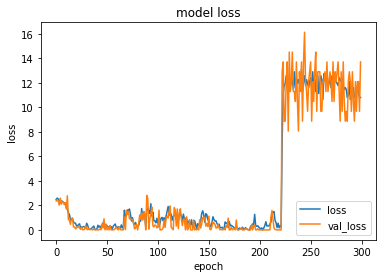

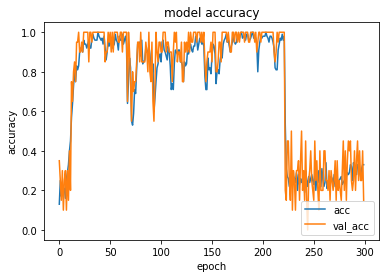

In [7]:
train_dir = pathlib.Path(work_dir + '/data/')
test_dir = pathlib.Path(work_dir + '/data/')    
    
model = CNN()
for layer in model.layers:
    layer.trainable = True
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])
    
history = model.fit_generator(
    train_datagen.flow_from_directory(train_dir,classes,10),
    steps_per_epoch=10,
    epochs=300,
    validation_data=test_datagen.flow_from_directory(test_dir,classes,10),
    validation_steps=2,
    #callbacks=[early_stopping]
)

save_name = work_dir + '/history/' + model_name
os.mkdir(save_name)
    
# 学習履歴をプロット
plot_history(history, save_name)
    
model.save(save_name + '/' + model_name  + '.h5')